In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('fifa_ols.csv', index_col=0)
df.head()

,Name,Age,Nation_C,Club_V,Club_N,Overall,Potential,Position_Class,Value,Wage,Special,International Reputation,Skill Moves,Joined,Loaned From,Contract Valid Until,Age_C,Over_C,Special_C,WR
0,L. Messi,31,0,3,16,94,94,3,110500000.0,565000.0,2202,5.0,4.0,"Jul 1, 2004",NaN,2021,6,18,1,2.0
1,Cristiano Ronaldo,33,2,3,15,94,94,3,77000000.0,405000.0,2228,5.0,5.0,"Jul 10, 2018",NaN,2022,7,18,1,2.0
2,Neymar Jr,26,0,3,14,92,93,3,118500000.0,290000.0,2143,5.0,5.0,"Aug 3, 2017",NaN,2022,4,17,1,3.0
3,De Gea,27,2,3,13,91,93,0,72000000.0,260000.0,1471,4.0,1.0,"Jul 1, 2011",NaN,2020,5,16,0,2.0
4,K. De Bruyne,27,2,3,13,91,92,2,102000000.0,355000.0,2281,4.0,4.0,"Aug 30, 2015",NaN,2023,5,16,1,4.0


In [4]:
df.query('Value==0')[['Name', 'Overall', 'Age', 'Joined', 'Contract Valid Until','Wage', 'Value','Loaned From','Position_Class']]

,Name,Overall,Age,Joined,Contract Valid Until,Wage,Value,Loaned From,Position_Class
864,Hilton,78,40,"Aug 1, 2011",2019,18000.0,0.0,NaN,1
3550,S. Nakamura,72,40,"Jan 10, 2017",2021,4000.0,0.0,NaN,2
4228,B. Nivet,71,41,"Jul 1, 2012",2019,5000.0,0.0,NaN,2
10356,F. Kippe,65,40,"Feb 22, 2002",2019,1000.0,0.0,NaN,1
12192,H. Sulaimani,63,41,"Jun 11, 2018",2019,3000.0,0.0,NaN,1
12453,W. Díaz,63,40,"Jan 10, 2016",2023,1000.0,0.0,NaN,1
14129,Y. Nakazawa,61,40,"Jan 1, 2002",2022,1000.0,0.0,NaN,1
17672,R. Kawai,53,39,"Jan 1, 2011",2021,1000.0,0.0,NaN,1
17726,T. Warner,53,44,"Aug 3, 2018",2019,1000.0,0.0,NaN,0
17752,S. Phillips,52,40,"Aug 1, 2017",2022,1000.0,0.0,NaN,0


In [5]:
value_zero=df[df.Value==0].index
df.drop(value_zero, inplace=True)

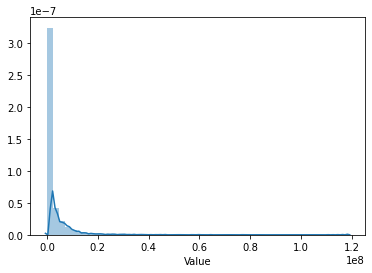

In [6]:
sns.distplot(df.Value)

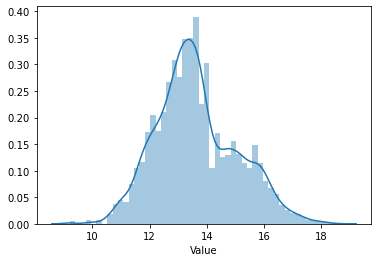

In [7]:
sns.distplot(np.log1p(df.Value))

In [8]:
df['Loaned From'].fillna(0,inplace=True)

In [9]:
def Loaned(df):
    if (df['Loaned From']==0):
        return 1
    else:
        return 0
df['Loaned']=df.apply(Loaned,axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17918 non-null  object 
 1   Age                       17918 non-null  int64  
 2   Nation_C                  17918 non-null  int64  
 3   Club_V                    17918 non-null  int64  
 4   Club_N                    17918 non-null  int64  
 5   Overall                   17918 non-null  int64  
 6   Potential                 17918 non-null  int64  
 7   Position_Class            17918 non-null  int64  
 8   Value                     17918 non-null  float64
 9   Wage                      17918 non-null  float64
 10  Special                   17918 non-null  int64  
 11  International Reputation  17918 non-null  float64
 12  Skill Moves               17918 non-null  float64
 13  Joined                    16654 non-null  object 
 14  Loaned

In [17]:
# 클럽 v넣기, overall 빼기
df1=df[['Club_V','Position_Class', 'Value', 'Wage','Age_C', 'Special_C','Loaned']]
df1.head()

,Club_V,Position_Class,Value,Wage,Age_C,Special_C,Loaned
0,3,3,110500000.0,565000.0,6,1,1
1,3,3,77000000.0,405000.0,7,1,1
2,3,3,118500000.0,290000.0,4,1,1
3,3,0,72000000.0,260000.0,5,0,1
4,3,2,102000000.0,355000.0,5,1,1


In [6]:
df.Loaned.unique()

array([1, 0], dtype=int64)

In [ ]:
첨도 1 이상의 특징들 
그래프를 그렸을 때 왼쪽이나 오른쪽으로 치우친 정도입니다. 종 모양 분포(정규분포)는 첨도 값이 0입니다. 첨도가 높으면 회귀 모델의 성능이 많이 떨어집니다.  
따라서 첨도가 높은 특징들에 로그 변환을 하여 첨도를 감소시키면 좋다

In [11]:
skew_cols = df1.skew().sort_values(ascending=False)
skew_cols

Wage                        7.857064
Value                       7.023271
Special_C                   4.711200
International Reputation    4.055795
Over_C                      2.441516
Age_C                       0.567304
Position_Class              0.108993
Club_V                     -0.048056
Loaned                     -3.353321
dtype: float64

In [ ]:
다중공선성 파악하는 방법
VIF = Variance inflation Factors 분산 팽창요인
안전 : vif <5
주의 : 5<vif<10
위험: 10<vif

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif factor'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['features']=df1.columns
vif

,vif factor,features
0,3.210486,Club_V
1,3.189048,Position_Class
2,4.993867,Value
3,4.765564,Wage
4,4.199998,Age_C
5,1.454784,Special_C
6,6.595512,Loaned


In [32]:
df2=df1.copy()

In [ ]:
로그화 ######

In [33]:
df2['log_W']=np.log1p(df2.Wage)
df2['log_V']=np.log1p(df2.Value)

In [36]:
df2.drop(['Value', 'Wage'], axis=1, inplace=True)

In [39]:
df2.head()

,Club_V,Position_Class,International Reputation,Age_C,Over_C,Special_C,Loaned,log_W,log_V
0,3,3,5.0,6,18,1,1,13.244583,18.520526
1,3,3,5.0,7,18,1,1,12.911645,18.159316
2,3,3,5.0,4,17,1,1,12.577640,18.590424
3,3,0,4.0,5,16,0,1,12.468441,18.092177
4,3,2,4.0,5,16,1,1,12.779876,18.440483


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17907 entries, 0 to 18206
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Club_V                    17907 non-null  object 
 1   Position_Class            17907 non-null  object 
 2   International Reputation  17907 non-null  float64
 3   Age_C                     17907 non-null  object 
 4   Over_C                    17907 non-null  object 
 5   Special_C                 17907 non-null  object 
 6   Loaned                    17907 non-null  object 
 7   log_W                     17907 non-null  float64
 8   log_V                     17907 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.4+ MB


In [41]:
log_df_o=pd.get_dummies(df2)

In [42]:
log_df_o.to_csv('log_df_o.csv')

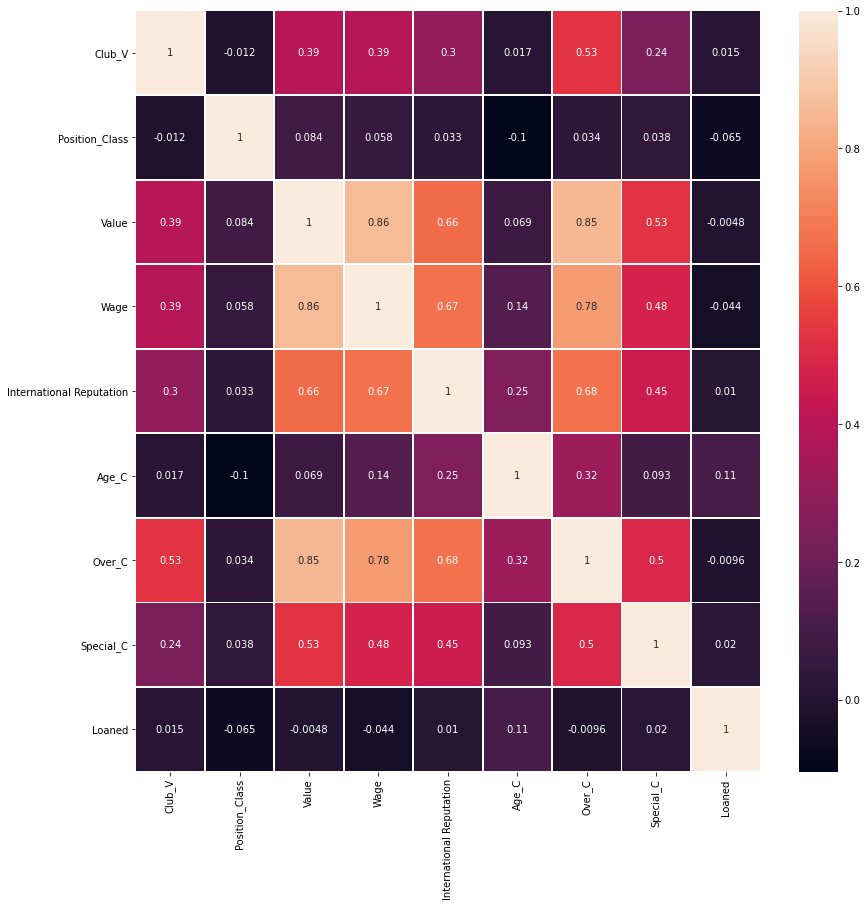

In [16]:
plt.figure(figsize=(14,14))
sns.heatmap(df1.corr(),linewidths=.8, annot=True) 

In [17]:
df1.columns

Index(['Club_V', 'Position_Class', 'Value', 'Wage', 'International Reputation',
       'Age_C', 'Over_C', 'Special_C', 'Loaned'],
      dtype='object')

In [19]:
df_o.columns

Index(['Value', 'Wage', 'International Reputation', 'Club_V_0', 'Club_V_1',
       'Club_V_2', 'Club_V_3', 'Position_Class_0', 'Position_Class_1',
       'Position_Class_2', 'Position_Class_3', 'Age_C_1', 'Age_C_10',
       'Age_C_11', 'Age_C_2', 'Age_C_3', 'Age_C_4', 'Age_C_5', 'Age_C_6',
       'Age_C_7', 'Age_C_8', 'Age_C_9', 'Over_C_1', 'Over_C_10', 'Over_C_11',
       'Over_C_12', 'Over_C_13', 'Over_C_14', 'Over_C_15', 'Over_C_16',
       'Over_C_17', 'Over_C_18', 'Over_C_2', 'Over_C_3', 'Over_C_4',
       'Over_C_5', 'Over_C_6', 'Over_C_7', 'Over_C_8', 'Over_C_9',
       'Special_C_0', 'Special_C_1', 'Loaned_0', 'Loaned_1'],
      dtype='object')

In [178]:
# df1.Over_C=df1.Over_C.astype('float')
# df1.Age_C=df1.Age_C.astype('float')
# df1.Club_V=df1.Club_V.astype('float')
# df1.Position_Class=df1.Position_Class.astype('float')
# df1.Special_C = df1.Special_C.astype('float')

In [19]:
# 범주화 -> 원핫인코딩
df1.Age_C=df1.Age_C.astype('str')
df1.Club_V=df1.Club_V.astype('str')
df1.Position_Class=df1.Position_Class.astype('str')
df1.Special_C = df1.Special_C.astype('str')
df1.Loaned=df1.Loaned.astype('str')
df_o=pd.get_dummies(df1)

In [21]:
df_o.to_csv('df_o.csv') 

In [ ]:
변수 : Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C,Loaned
종속 변수 그대로
원핫 인코딩 : Age_C,Over_C,Special_C,Loaned,Club_V,Position_Class

In [20]:
df_o.columns

Index(['Value', 'Wage', 'Club_V_0', 'Club_V_1', 'Club_V_2', 'Club_V_3',
       'Position_Class_0', 'Position_Class_1', 'Position_Class_2',
       'Position_Class_3', 'Age_C_1', 'Age_C_10', 'Age_C_11', 'Age_C_2',
       'Age_C_3', 'Age_C_4', 'Age_C_5', 'Age_C_6', 'Age_C_7', 'Age_C_8',
       'Age_C_9', 'Special_C_0', 'Special_C_1', 'Loaned_0', 'Loaned_1'],
      dtype='object')

### 모델링

In [30]:
X= df_o.drop(['Wage'],axis = 1)
y= df_o['Wage']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=156)
# 단순 회귀 분석 모형 생성 및 평가
lr = LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred) # r_square = lr.score(X_test, y_test)도 같은 값

print('MSE: {0:.3f}, RMSE: {1:.3f}, r2 score: {2:.3f}'.format(mse, rmse,r2))

MSE: 152461012.124, RMSE: 12347.510, r2 score: 0.792


In [ ]:
변수 중요도 살펴보기

In [31]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(lr, random_state=156).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.2356 ± 0.0344,Value
0.0088 ± 0.0017,Club_V_3
0.0074 ± 0.0011,Age_C_2
0.0054 ± 0.0018,Age_C_3
0.0041 ± 0.0013,Age_C_1
0.0016 ± 0.0004,Special_C_1
0.0015 ± 0.0001,Special_C_0
0.0014 ± 0.0007,Club_V_0
0.0013 ± 0.0007,Age_C_4
0.0011 ± 0.0004,Club_V_1


In [ ]:
Nation 빼기 전 MSE: 116897521.259, RMSE: 10811.916, r2 score: 0.841
Wr 빼기 전,  후 MSE: 116708754.501, RMSE: 10803.183, r2 score: 0.842
Skill Moves  빼기 전,  후 MSE: 116658189.445, RMSE: 10800.842, r2 score: 0.842
Potential 빼기 전,     후 MSE: 116657234.829, RMSE: 10800.798, r2 score: 0.842
                       후 MSE: 116657604.383, RMSE: 10800.815, r2 score: 0.842

In [70]:
coef(기울기, 회귀 계수)

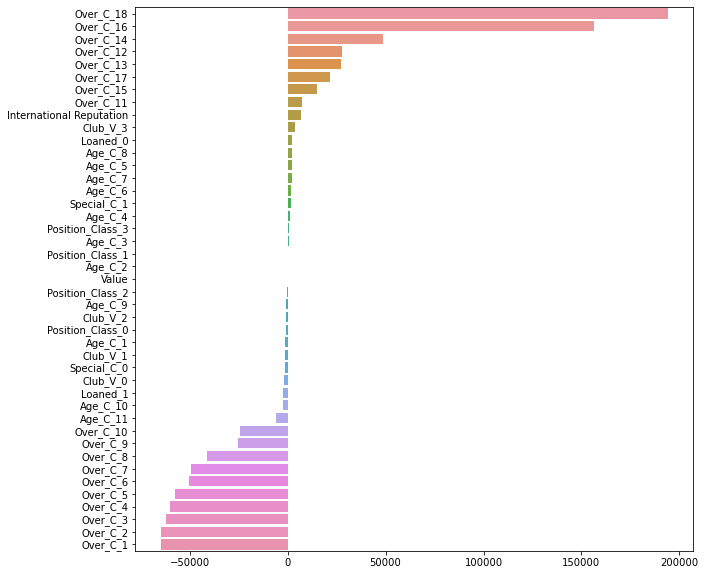

In [44]:
plt.figure(figsize=(10,10))
coef = pd.Series(lr.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

In [147]:
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-7.74150420e+08 -3.72319485e+07 -7.92889515e+06 -4.81218733e+06
 -7.81708051e+06]
 5 folds 의 개별 RMSE scores :  [27823.56  6101.8   2815.83  2193.67  2795.9 ]
 5 folds 의 평균 RMSE : 8346.152 


In [148]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [149]:
from sklearn.linear_model import Ridge
alphas = [3400,5000,7000,10000]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha ={0:}, 5 folds의 평균 RMSE: {1:.4f}'.format(alpha, avg_rmse))    

alpha =3400, 5 folds의 평균 RMSE: 7231.4423
alpha =5000, 5 folds의 평균 RMSE: 7219.4478
alpha =7000, 5 folds의 평균 RMSE: 7242.3829
alpha =10000, 5 folds의 평균 RMSE: 7285.5784


In [150]:
ridge=Ridge(alpha=5000)
neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE socres:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {:.4f}'.format(avg_rmse))

5 folds의 개별 Negative MSE socres: [-5.83851678e+08 -4.18321768e+07 -8.20580083e+06 -2.75812775e+06
 -8.85665580e+05]
5 folds의 개별 RMSE scores [24163.02  6467.78  2864.58  1660.76   941.1 ]
5 folds의 평균 RMSE: 7219.4478


In [117]:
# 라쏘 회귀
from sklearn.linear_model import Lasso, ElasticNet
def get_linear_reg_eval(model_name, params = None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha= param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mse_scores= cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {}일 때 5 폴드 세트의 평균 RMSE:{:.4f}'.format(param, avg_rmse))
        model.fit(X, y)
        coeff=pd.Series(data=model.coef_, index=X.columns)
        colname='alpha:'+str(param)
        coeff_df[colname]=coeff
    return coeff_df

In [19]:
lasso_alphas=[0.00001,0.0001, 0.001,0.01]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X, 
                                     y_target_n = y)
coeff_lasso_df

###### Lasso ######
alpha 1e-05일 때 5 폴드 세트의 평균 RMSE:8209.2341
alpha 0.0001일 때 5 폴드 세트의 평균 RMSE:8209.2476
alpha 0.001일 때 5 폴드 세트의 평균 RMSE:8209.3826
alpha 0.01일 때 5 폴드 세트의 평균 RMSE:8210.7345


,alpha:1e-05,alpha:0.0001,alpha:0.001,alpha:0.01
Value,1.382186e-03,1.382211e-03,0.001382,1.384892e-03
International Reputation,6.971174e+03,6.971236e+03,6971.860391,6.978100e+03
Club_V_0,-3.023605e+03,-3.023127e+03,-3018.347053,-2.970548e+03
Club_V_1,-2.962382e+03,-2.961902e+03,-2957.102664,-2.909112e+03
Club_V_2,-2.398547e+03,-2.398065e+03,-2393.240782,-2.345002e+03
Club_V_3,2.387487e+03,2.387966e+03,2392.756301,2.440659e+03
Position_Class_0,-1.449824e+03,-1.449808e+03,-1449.646805,-1.448037e+03
Position_Class_1,2.197065e+01,2.198040e+01,22.077924,2.305317e+01
Position_Class_2,-4.909029e+02,-4.909042e+02,-490.916956,-4.910444e+02
Position_Class_3,4.842295e+02,4.842268e+02,484.199275,4.839244e+02


In [103]:
from sklearn.model_selection import train_test_split , GridSearchCV
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=156)
# model 별로 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred= lr_reg.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred) # r_square = lr.score(X_test, y_test)도 같은 값
print('### lr ###\n MSE: {0:.3f}, RMSE: {1:.3f}, r2 score: {2:.3f}'.format(mse, rmse,r2))


ridge_reg = Ridge(alpha=5000)
ridge_reg.fit(X_train, y_train)
pred= ridge_reg.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred) # r_square = lr.score(X_test, y_test)도 같은 값
print('### ridge ###\n MSE: {0:.3f}, RMSE: {1:.3f}, r2 score: {2:.3f}'.format(mse, rmse,r2))

lasso_reg = Lasso(alpha=0.00001)
lasso_reg.fit(X_train, y_train)
pred= lasso_reg.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred) # r_square = lr.score(X_test, y_test)도 같은 값
print('### lasso ###\n MSE: {0:.3f}, RMSE: {1:.3f}, r2 score: {2:.3f}'.format(mse, rmse,r2))

### lr ###
 MSE: 114792344.933, RMSE: 10714.119, r2 score: 0.843
### ridge ###
 MSE: 152101357.195, RMSE: 12332.938, r2 score: 0.792
### lasso ###
 MSE: 114792356.303, RMSE: 10714.119, r2 score: 0.843


In [123]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg=RandomForestRegressor(random_state=0, n_estimators=500)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=500)
xbg_reg=XGBRegressor(n_estimators=500)
lgb_reg=LGBMRegressor(n_estimators=500)

models=[lr_reg,rf_reg, xbg_reg, lgb_reg]
for model in models:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=False)

### LinearRegression ###


TypeError: 'numpy.float64' object is not callable

In [ ]:
종속변수 로그화

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    r2 = r2_score(y,pred)
    print('RMSLE:{0:.4f}, RMSE:{1:.4f}, MAE:{2:.4f}, R2: {3:.4f}'.format(rmsle_val, rmse_val, mae_val, r2))


value log화

In [32]:
log_value=np.log1p(df.Value)
df_o_log_value = pd.concat([df_o,log_value], axis=1)
df_o_log_value.drop('Value', axis=1, inplace=True)

In [35]:
# 종속변수, 독립변수 둘 다  Value 로그화-> 음.. 떨어진다!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

y = df_o['Wage']
log_y = np.log1p(y)
X_v= df_o_log_value.drop('Wage', axis=1)

X_train , X_test , y_train , y_test = train_test_split(X_v, log_y ,test_size=0.2, 
                                                       random_state=1)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train ,y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

RMSLE:0.8006, RMSE:20725.8907, MAE:6297.6422, R2: 0.2929


In [157]:
plt.figure(figsize=(10,10))
coef = pd.Series(lr_reg.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y = coef_sort.index)

ValueError: Length of passed values is 41, index implies 42.

<Figure size 720x720 with 0 Axes>

In [105]:
# 종속변수만  로그화
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

y = df_o['Wage']
log_y = np.log1p(y)
X= df_o.drop('Wage', axis=1)

X_train , X_test , y_train , y_test = train_test_split(X, log_y ,test_size=0.2, 
                                                       random_state=1)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train ,y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

RMSLE:0.6637, RMSE:23094.1924, MAE:4907.4191, R2: 0.1221


In [ ]:
ㅠㅠ R2가 이상하게 나옴..

In [106]:
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_v, log_y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSLE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSLE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-2.85102723e+24 -5.50000000e-01 -4.20000000e-01 -4.10000000e-01
 -1.70000000e-01]
 5 folds 의 개별 RMSLE scores :  [1.68849851e+12 7.40000000e-01 6.50000000e-01 6.40000000e-01
 4.10000000e-01]
 5 folds 의 평균 RMSLE : 337699702603.025 


In [108]:
from sklearn.linear_model import Ridge
alphas = [0.01,1,3,5,10]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X_v, log_y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha ={0:}, 5 folds의 평균 RMSLE: {1:.4f}'.format(alpha, avg_rmse))    

alpha =0.01, 5 folds의 평균 RMSLE: 0.7955
alpha =1, 5 folds의 평균 RMSLE: 0.7960
alpha =3, 5 folds의 평균 RMSLE: 0.7970
alpha =5, 5 folds의 평균 RMSLE: 0.7979
alpha =10, 5 folds의 평균 RMSLE: 0.7999


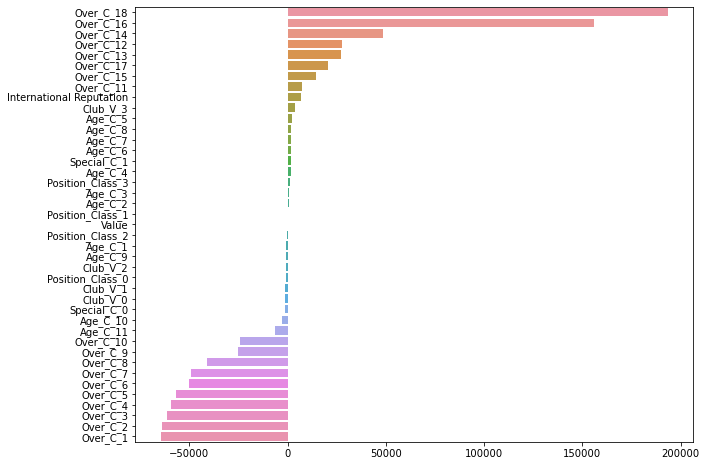

In [110]:
plt.figure(figsize=(10,8))
coef = pd.Series(lr.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y = coef_sort.index)

In [114]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_v, log_y, 
                                                    test_size=0.2, random_state=1)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.01)
lasso_reg = Lasso(alpha=10)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE:0.6671, RMSE:10912.7969, MAE:4414.0906, R2: 0.8040
### Ridge ###
RMSLE:0.6671, RMSE:10931.9604, MAE:4403.9625, R2: 0.8033
### Lasso ###
RMSLE:1.2308, RMSE:25367.3645, MAE:8466.1896, R2: -0.0593


In [ ]:
lasso 알파는 커질수록 일부 피처의 회귀 계수가 0이 될 수 있는데..
너무 작아서 좋지 않아보인다. - 

In [118]:
lasso_alphas=[0.0001,0.0002,0.0003,0.0004,1,5,10]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X_v, 
                                     y_target_n = log_y)
coeff_lasso_df

###### Lasso ######
alpha 0.0001일 때 5 폴드 세트의 평균 RMSE:0.8028
alpha 0.0002일 때 5 폴드 세트의 평균 RMSE:0.8156
alpha 0.0003일 때 5 폴드 세트의 평균 RMSE:0.8196
alpha 0.0004일 때 5 폴드 세트의 평균 RMSE:0.8236
alpha 1일 때 5 폴드 세트의 평균 RMSE:1.3303
alpha 5일 때 5 폴드 세트의 평균 RMSE:1.3303
alpha 10일 때 5 폴드 세트의 평균 RMSE:1.3303


,alpha:0.0001,alpha:0.0002,alpha:0.0003,alpha:0.0004,alpha:1,alpha:5,alpha:10
Value,1.378785e-03,1.378812e-03,0.001379,0.001379,1.610581e-03,2.157149e-03,0.002565
International Reputation,6.991603e+03,6.991673e+03,6991.742849,6991.812623,7.556167e+03,8.913939e+03,9862.742784
Club_V_0,-3.027851e+03,-3.027320e+03,-3026.788601,-3026.257243,-6.347371e+02,-6.128089e+02,-590.835143
Club_V_1,-2.957481e+03,-2.956948e+03,-2956.415126,-2955.881972,-5.594776e+02,-5.379683e+02,-508.017960
Club_V_2,-2.397790e+03,-2.397254e+03,-2396.718064,-2396.182098,3.241373e+00,2.815671e+00,1.888730
Club_V_3,2.384973e+03,2.385505e+03,2386.037385,2386.569686,4.724352e+03,4.539554e+03,4328.177032
Position_Class_0,-1.444887e+03,-1.444869e+03,-1444.851947,-1444.834565,-1.293975e+03,-9.090422e+02,-616.858517
Position_Class_1,1.750537e+01,1.751635e+01,17.527332,17.538311,1.119406e+02,3.319895e+02,470.641718
Position_Class_2,-4.893937e+02,-4.893951e+02,-489.396510,-489.397904,-5.021857e+02,-5.310465e+02,-574.643262
Position_Class_3,4.837396e+02,4.837364e+02,483.733333,483.730220,4.559389e+02,3.665639e+02,272.140085


In [119]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [121]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg=RandomForestRegressor(random_state=0, n_estimators=500)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=500)
xbg_reg=XGBRegressor(n_estimators=500)
lgb_reg=LGBMRegressor(n_estimators=500)

models=[lr_reg,rf_reg, xbg_reg, lgb_reg]
for model in models:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=False)

### LinearRegression ###
RMSLE:0.0716, RMSE:0.6671, MAE:0.4786, R2: 0.7061
### RandomForestRegressor ###
RMSLE:0.0723, RMSE:0.6753, MAE:0.4837, R2: 0.6988
### XGBRegressor ###
RMSLE:0.0724, RMSE:0.6773, MAE:0.4850, R2: 0.6970
### LGBMRegressor ###
RMSLE:0.0719, RMSE:0.6718, MAE:0.4812, R2: 0.7020
